In [2]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

(X_train,y_train),(X_test,y_test) = mnist.load_data()
X_train = X_train.reshape(60000, 28, 28, 1).astype('float32') 
X_test = X_test.reshape(10000, 28, 28, 1).astype('float32')

X_train /= 255
X_test /= 255

n_classes = 10
y_train = to_categorical(y_train,n_classes)
y_test = to_categorical(y_test,n_classes)
random_seed = 2
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.1, random_state=random_seed)

In [3]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

In [4]:
optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

In [5]:
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [6]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [7]:
epochs = 30 # Turn epochs to 30 to get 0.9967 accuracy
batch_size = 86

In [8]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(X_train)

In [9]:
history = model.fit(datagen.flow(X_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_test,y_test),
                              verbose = 1, steps_per_epoch=X_train.shape[0] // batch_size
                              , callbacks=[learning_rate_reduction])

Epoch 1/30
627/627 [==============================] - 15s 19ms/step - loss: 0.3460 - accuracy: 0.8910 - val_loss: 0.0493 - val_accuracy: 0.9848
Epoch 2/30
627/627 [==============================] - 11s 18ms/step - loss: 0.1091 - accuracy: 0.9669 - val_loss: 0.0459 - val_accuracy: 0.9873
Epoch 3/30
627/627 [==============================] - 11s 18ms/step - loss: 0.0819 - accuracy: 0.9756 - val_loss: 0.0267 - val_accuracy: 0.9912
Epoch 4/30
627/627 [==============================] - 11s 18ms/step - loss: 0.0705 - accuracy: 0.9798 - val_loss: 0.0345 - val_accuracy: 0.9910
Epoch 5/30
627/627 [==============================] - 12s 19ms/step - loss: 0.0658 - accuracy: 0.9816 - val_loss: 0.0381 - val_accuracy: 0.9883
Epoch 6/30
627/627 [==============================] - 12s 19ms/step - loss: 0.0632 - accuracy: 0.9813 - val_loss: 0.0412 - val_accuracy: 0.9900
Epoch 7/30
627/627 [==============================] - 12s 19ms/step - loss: 0.0595 - accuracy: 0.9833 - val_loss: 0.0304 - val_accuracy:

Epoch 28/30
627/627 [==============================] - 11s 18ms/step - loss: 0.0920 - accuracy: 0.9783 - val_loss: 0.0919 - val_accuracy: 0.9880
Epoch 29/30
627/627 [==============================] - 11s 18ms/step - loss: 0.0997 - accuracy: 0.9774 - val_loss: 0.0540 - val_accuracy: 0.9877
Epoch 30/30
627/627 [==============================] - 11s 18ms/step - loss: 0.0944 - accuracy: 0.9770 - val_loss: 0.0563 - val_accuracy: 0.9910


In [10]:
import numpy as np
import matplotlib.pyplot as plt
def show_images_labels_predictions(images,labels,predictions,start_id,num=10):
    plt.gcf().set_size_inches(12,14)
    if num>25: 
        num=25
    for i in range(num):
        ax = plt.subplot(5,5,i+1)
        ax.imshow(images[start_id],cmap='binary')
        
        # 有 AI 預測結果資料,才在標題顯示預測結果
        if(len(predictions)>0):
            title = 'ai = ' + str(predictions[start_id])
            
            # 預測正確顯示 (o) 錯誤顯示 (x)
            title += ('(o)' if predictions[start_id]==labels[start_id] else '(x)')

            title += '\nlabel = ' + str(labels[start_id])
        
        # 沒有 AI 預測結果資料,只在標題顯示真實數值
        else :
            title = 'label = ' + str(labels[start_id])

        ax.set_title(title,fontsize = 12)
        
        # X,Y軸不顯示刻度
        ax.set_xticks([])
        ax.set_yticks([])
        start_id += 1
    plt.show()

y_label = np.argmax(y_test, axis=-1)

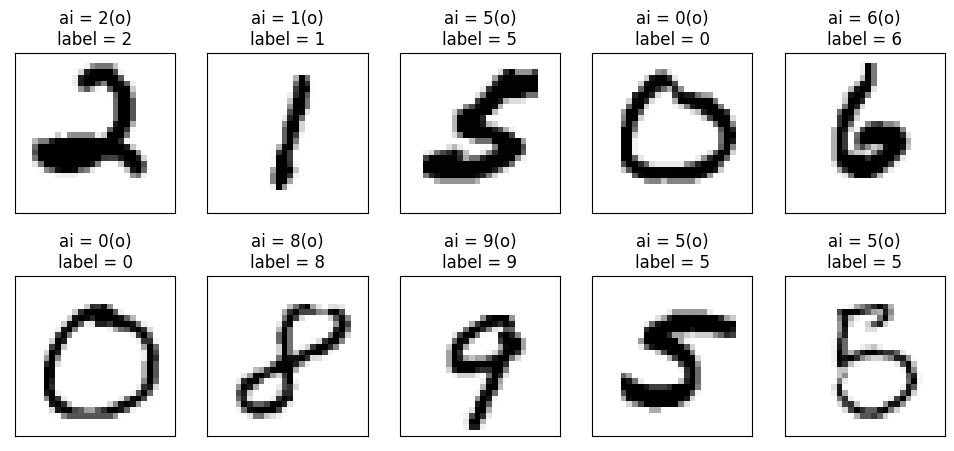

In [11]:
prediction = np.argmax(model.predict(X_test), axis=-1)

show_images_labels_predictions(X_test,y_label,prediction,0)

In [12]:
import glob,cv2
import numpy as np
files = glob.glob("image_file1\*.jpg")

test_feature = []
test_label = []

for file in files:
    img = cv2.imread(file)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # 灰階
    _, img = cv2.threshold(img, 127, 255,cv2.THRESH_BINARY_INV) # 轉為反向黑白
    test_feature.append(img)
    label = file[12:13]  # image_file1\*.jpg 第12個字元'*'為label
    test_label.append(int(label))

test_feature = np.array(test_feature)
test_label = np.array(test_label)

print(type(test_feature))

test_feature_vector = test_feature.reshape(10, 28, 28, 1).astype('float32')
test_feature_normalize = test_feature_vector/255

<class 'numpy.ndarray'>


In [13]:
import matplotlib.pyplot as plt
def show_images(images,start_id,num=10):
    plt.gcf().set_size_inches(12,14)
    if num>25: 
        num=25
    for i in range(num):
        ax = plt.subplot(5,5,i+1)
#         ax.imshow(images[start_id],cmap='binary')
        ax.imshow(images[start_id],cmap='gray')
      
        # X,Y軸不顯示刻度
        ax.set_xticks([])
        ax.set_yticks([])
        start_id += 1
    plt.show()

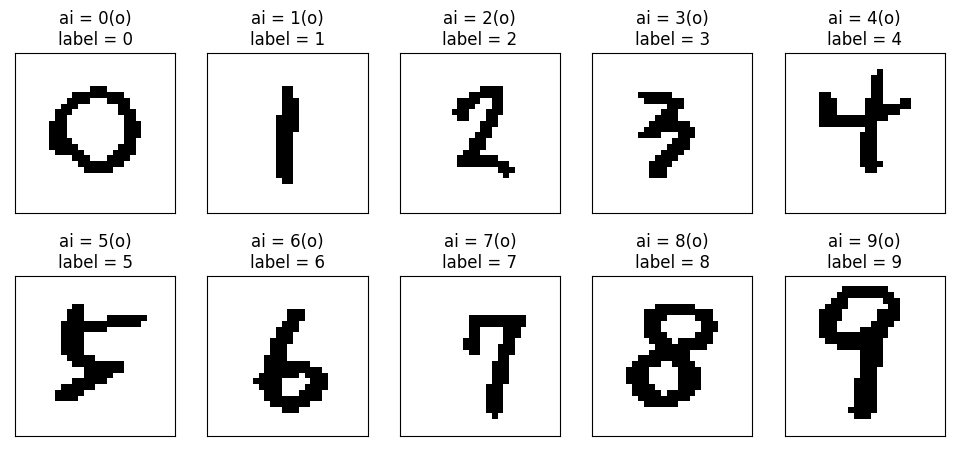

In [14]:
prediction = np.argmax(model.predict(test_feature_normalize), axis=-1)

show_images_labels_predictions(test_feature_normalize,test_label,prediction,0)

In [15]:
model.save('./YGCNN_model.h5')

In [16]:
model.save_weights('./YGCNN_model.weight')